In [1]:
#Boston housing dataset 
#predict housing value 
#Regression tree 

## Final Results - JAN17

**Accuracy with 5 fold cross validation**:  0.098 

**MSE**:  0.91

**R-squared**:  0.19

---------------------------------------------------
## Final Results - JAN18

This is the final result with Test set.

**MSE**: 1.002

**R-squared**: 11%

In [2]:
import pandas as pd
import numpy as np 

#read data
ds = pd.read_csv("dataset.csv")
ds.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS
0,12.216023,2,3,2005,1600.0,22000.000000,6
1,12.860999,4,4,2009,3500.0,4000.000000,9
2,11.884489,2,3,2006,1364.0,7500.000000,6
3,11.775290,1,1,1985,650.0,43925.933653,4
4,12.206073,2,5,1975,3000.0,22000.000000,9


In [3]:
#cross-validation 

from sklearn.model_selection import train_test_split

#requires numpy arrays so convert 
#x values are everything else, but lOGVALUE
#y values are LOGVALUE

x = ds[['BATHS','BEDRMS','BUILT','UNITSF','LOT','ROOMS']]
y = ds['LOGVALUE']

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(type(x_train))
print(x_train.shape)
print(x_train.ndim)

<class 'numpy.ndarray'>
(6999, 6)
2


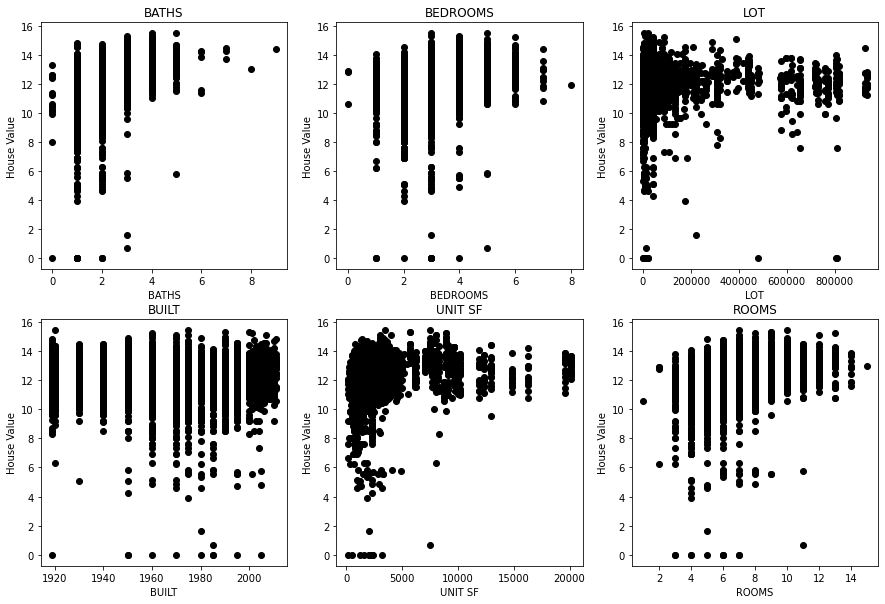

In [4]:
#looking at the dataset to see if any of the x values are more obviously related to the house value 
x1 = np.array(ds['BATHS'])
x2 = np.array(ds['BEDRMS'])
x3 = np.array(ds['BUILT'])
x4 = np.array(ds['UNITSF'])
x5 = np.array(ds['LOT'])
x6 = np.array(ds['ROOMS'])

all_x = [x1, x2, x3, x4, x5, x6]
col_names = ['BATHS','BEDROOMS','BUILT','UNIT SF', 'LOT', 'ROOMS']

import matplotlib.pyplot as plt 

fig_size = (15,10)
fig = plt.figure(figsize = fig_size)
grid = fig.add_gridspec(2,3)

def draw_graph(f, data_x, data_y, name, loc_x, loc_y):
    ax = f.add_subplot(grid[loc_x, loc_y])
    ax.scatter(data_x, data_y, color = 'black')
    ax.set(title = name, ylabel = 'House Value', xlabel = name)
    return f

locs = [[0,0],[0,1],[1,0],[1,1],[0,2],[1,2]] 

for i in range(6):
    draw_graph(fig, all_x[i], y, col_names[i],locs[i][0], locs[i][1])

plt.show()


Going through the graphs one by one: 

1. Number of Bathrooms 
    It seems that there is a y = x^(fractional) relationship here. 
2. Number of Bedrooms 
    It seems that there is a y = -x^(positive) relationship here. 
3. LOT 
    It seems that there is a linear neutral relationship here. 
4. BUILT 
    Doesn't look like any relationship is there? 
5. UNIT SF
    Similar case to LOT. 
6. ROOMS 
    Similar to Bedrooms 

In [5]:
#some notes about regression tree: 



- According to ISLR's example in the regtree section, data was transformed into "normal" looking distribution using a log-transform. 

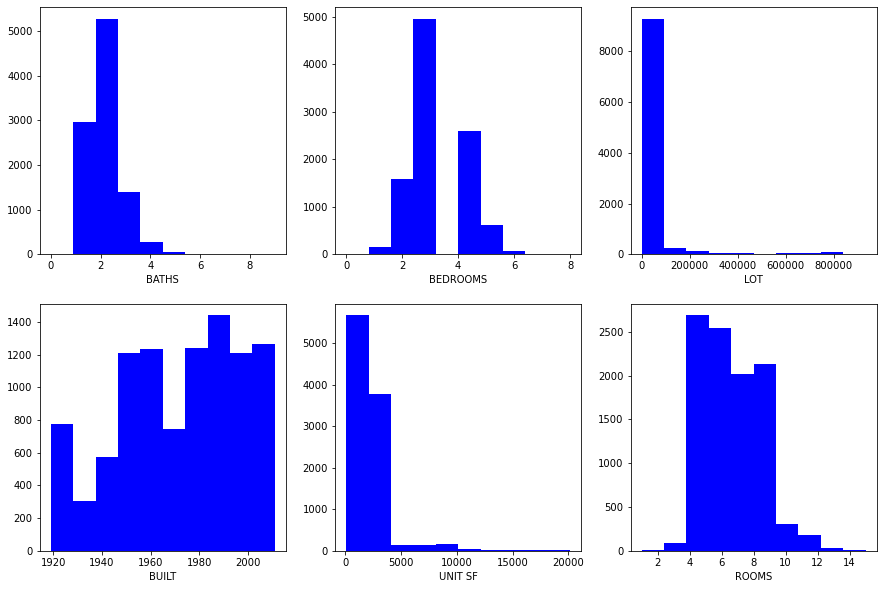

In [6]:
#data transformation 
#first I will look at data to see which ones are normal

f2 = plt.figure(figsize = (15,10))
grid2 = f2.add_gridspec(2,3)

def draw_graph_hist(f, data, name, loc_x, loc_y):
    ax = f.add_subplot(grid2[loc_x, loc_y])
    ax.hist(data, color = 'blue')
    ax.set(xlabel = name)
    return f

locs2 = [[0,0],[0,1],[1,0],[1,1],[0,2],[1,2]] 

for i in range(6):
    draw_graph_hist(f2, all_x[i], col_names[i], locs[i][0], locs[i][1])


plt.show()

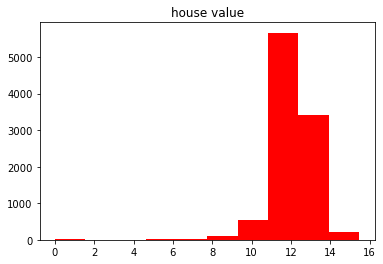

In [7]:
#house value 

plt.hist(y, color = 'red')
plt.title('house value')

plt.show()

normal looking : Rooms, Bedrooms (missing value), Baths (just a bit skewed - this can be fixed with log-transform), house value (skewed)
non-normal : unit SF, LOT --> both look exponensial 
Built : looks close to uniform 

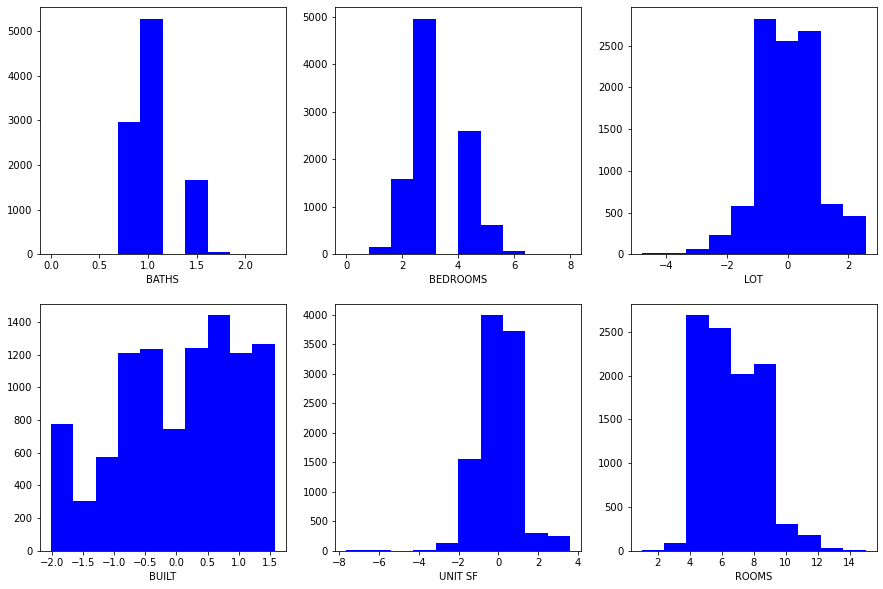

In [8]:
#scaling data 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer
log_transformer = FunctionTransformer(np.log1p)
# norm = Normalizer().fit(y.reshape(-1,1))

#log to be used for skewed data 
x1_log = log_transformer.transform(x1)
# y_log = norm.transform(y.reshape(-1,1))

#power to be used for exponential 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="box-cox")

x4_pow = pt.fit(x4.reshape(-1,1)).transform(x4.reshape(-1,1))
x5_pow = pt.fit(x5.reshape(-1,1)).transform(x5.reshape(-1,1))

#standarization for built 
from sklearn import preprocessing 
x3_reshaped = x3.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(x3_reshaped)
x3_std = scaler.transform(x3_reshaped)

#now repeat same things as above cell 
f3 = plt.figure(figsize = (15,10))
grid3 = f3.add_gridspec(2,3)

def draw_graph_hist3(f, data, name, loc_x, loc_y):
    ax = f.add_subplot(grid3[loc_x, loc_y])
    ax.hist(data, color = 'blue')
    ax.set(xlabel = name)
    return f

all_x_scl = [x1_log, x2, x3_std, x4_pow, x5_pow, x6]

for i in range(6):
    draw_graph_hist3(f3, all_x_scl[i], col_names[i], locs[i][0], locs[i][1])


plt.show()

In [9]:
#since almost all the variables look better, I'll work on these. 

#changing dataset 
house_value = y
baths = x1_log
bedrooms = x2
year_built = x3_std
unit_sf = x4_pow
lot = x5_pow
rooms = x6

# print(lot)
# print(bedrooms.ndim)
# print(bedrooms.shape)
# print(np.transpose(lot).ndim)
# print(np.transpose(lot).shape)

x_new = np.concatenate((baths.reshape(-1,1), bedrooms.reshape(-1,1), year_built.reshape(-1,1), unit_sf.reshape(-1,1), lot.reshape(-1,1), rooms.reshape(-1,1)), axis=1)
# print(x_new.ndim)
# print(x_new.shape)
# print(x_new[0:5])

df_x = pd.DataFrame(x_new, columns = ['baths', 'bedrooms', 'year_built', 'unit_sf', 'lot', 'rooms'])
x_new_np = np.array(df_x)

xn_train, xn_test, yn_train, yn_test = train_test_split(x_new_np, y, test_size = 0.3, random_state=0)

In [10]:
#very basic first regtree 

from sklearn.tree import DecisionTreeRegressor
rt0 = DecisionTreeRegressor(max_depth = 3, random_state=0)
rt0.fit(x_train, y_train)
#predictions 
p0 = rt0.predict(x_test)

#calculate MSE
from sklearn.metrics import mean_squared_error
mse_t0 = mean_squared_error(p0, y_test)

print('first tree MSE is: ', mse_t0)

first tree MSE is:  0.9185010330280685


      baths  bedrooms  year_built   unit_sf       lot  rooms
0  1.098612       3.0    1.343446 -0.352242  0.397116    6.0
1  1.609438       4.0    1.499599  1.086556 -1.081300    9.0
2  1.098612       3.0    1.382484 -0.673275 -0.491368    6.0
3  0.693147       1.0    0.562678 -2.301454  0.896287    4.0
4  1.098612       5.0    0.172294  0.820172  0.397116    9.0


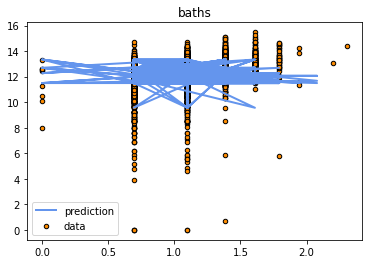

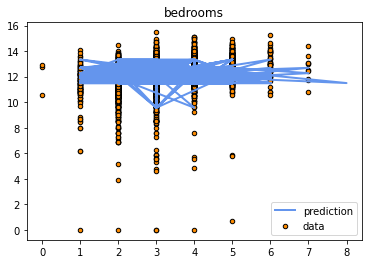

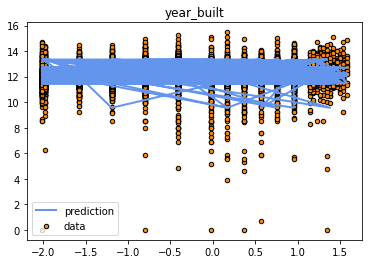

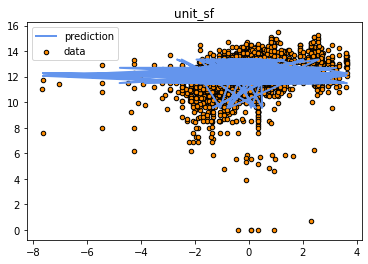

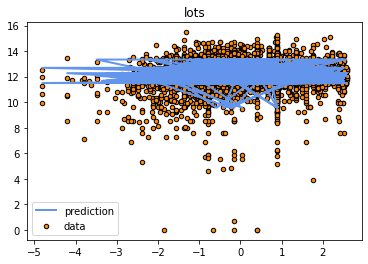

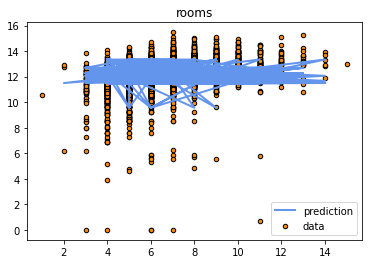

In [11]:
#visualizing the tree 
#xn_train, xn_test, yn_train, yn_test

print(df_x.head())
   
def tree_prediction_vis(x,y,test,prediction,name):
    plt.figure()
    plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(test, prediction, color="cornflowerblue", label="prediction", linewidth=2)
    plt.title(name)
    plt.legend()

    
for i in range(6):
    #x's vs y - each time using just 1 variable 
    xfor = df_x.iloc[:, i]
    xfor = np.array(xfor)
    xtr, xte, ytr, yte = train_test_split(xfor.reshape(-1,1), y, test_size = 0.3, random_state = 0)
    ns = ['baths','bedrooms','year_built','unit_sf','lots','rooms']
    tree_prediction_vis(xtr, ytr, xte, p0, ns[i])

plt.show()

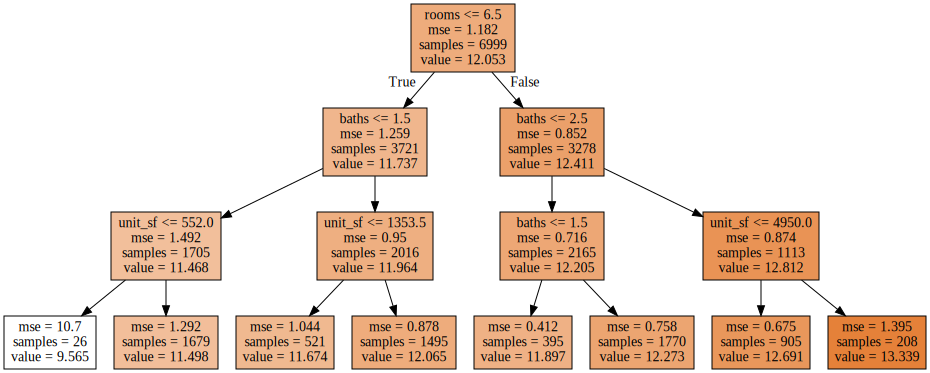

In [12]:
import graphviz
from sklearn import tree

dotd = tree.export_graphviz(rt0, out_file=None, feature_names=df_x.columns, filled = True)
rt0grph = graphviz.Source(dotd, format="png") 
rt0grph

# graph.render("decision_tree_graphivz")

now, I will use pruning to make this tree better 

in addition, different variables' effect on the y value can determine whether they are used in regtree or not 

from itertools import chain, combinations
this whole part is commented out because I kept getting "Memory Error" even when using a VM at University. I believe the issue is about list(chain) 
because it is list comprehension and a bunch of other things working with 2 to the power of 6 (128) variables and combining each with another. 
I couldn't find a solution to this in time, so in the cell below I'll test random combinations. 

#x options are based on different lengths 
def x_options(x, le):
    """
    returns possible combination of x's to be given to the tree
    returned value is a list of tuples.
    """
    x_l = list(x)
    res = list(chain.from_iterable(combinations(x_l,r) for r in range(1,len(x_l)+1)))
    temp = []
    
    for i in range(len(res)):
        if len(res[i]) == le:
            temp.append(res[i])
        else:
            continue
    return temp

def try_trees(x,y,d):
    """x value, y and tree depth values are given. A tree based on the x and y is constructed, it's MSE is calculated and returned."""
    xt, xte, yt, yte = train_test_split(x,y, test_size=.3, random_state=1)
    
    from sklearn.tree import DecisionTreeRegressor
    rt = DecisionTreeRegressor(max_depth = d, random_state=0)
    rt.fit(xt, yt)
    p = rt.predict(xte)

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(p, yte)
    
    print("Tree with depth: ", d, " has MSE of: ", mse)
    return mse

# df_x = pd.DataFrame(x_new, columns = ['baths', 'bedrooms', 'year_built', 'unit_sf', 'lot', 'rooms'])

def call_combinations(datax):
    """make combination of datasets with varying lengths"""
    dict_combs = {}
    keys = ['one','two','three','four','five','six']
    for i in range(1,7):
        dict_combs[keys[i]] = x_options(datax, i)
        
    return dict_combs

#all size ones
def make_tree(d):
    """
    1. Seperate data so you have x's of varying lengths from 1 to 6 
    2. Use varying sizes to generate different trees and report their results 
    """
    
    dict_combs = call_combinations(d)
    
    for k,v in dict_combs.items():
        print("length ", k, ' combinations results are: ')
        for i in range(v):
            #go inside the list, get the only element inside the tuple, turn it into np array
            print("For combination of: ", v[i])
            mse = try_trees(np.asarray(v[i]),y,depth)
    return "end" 

#turn data into np array
cols_names = list(df_x.columns)
df_np = np.array(df_x) 

make_tree(df_np)

In [13]:
#forget about the one above. I'll just do 5 random ones: 

xr1 = df_x[['baths','bedrooms','rooms']]
xr2 = df_x[['lot','unit_sf']]
xr3 = df_x[['year_built','bedrooms','rooms']]
xr4 = df_x[['baths','bedrooms','lot','unit_sf']]
xr5 = df_x[['baths','bedrooms','year_built','unit_sf','lot','rooms']]
yr = ds['LOGVALUE']

colnames = [xr1.columns, xr2.columns, xr3.columns, xr4.columns, xr5.columns]

xr1 = np.array(xr1)
xr2 = np.array(xr2)
xr3 = np.array(xr3)
xr4 = np.array(xr4)
xr5 = np.array(xr5)
yr = np.array(yr)

all_tree = [xr1,xr2,xr3,xr4,xr5]

def const_trees(x,y,d, namescol):
    """x value, y and tree depth values are given. A tree based on the x and y is constructed, it's MSE is calculated and returned."""
    xt, xte, yt, yte = train_test_split(x,y, test_size=.3, random_state=1)
    
    from sklearn.tree import DecisionTreeRegressor
    rt = DecisionTreeRegressor(max_depth = d, random_state=0)
    rt.fit(xt, yt)
    p = rt.predict(xte)

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(p, yte)
    
    print("Tree is formed with: ", namescol)
    print("This Tree with depth: ", d, " has MSE of: ", mse)
    return mse

dep = [2,2,3,3,3]

for i in range(len(all_tree)):
    const_trees(all_tree[i],yr,dep[i],colnames[i])
    

Tree is formed with:  Index(['baths', 'bedrooms', 'rooms'], dtype='object')
This Tree with depth:  2  has MSE of:  1.0030841706479205
Tree is formed with:  Index(['lot', 'unit_sf'], dtype='object')
This Tree with depth:  2  has MSE of:  1.0389847344305574
Tree is formed with:  Index(['year_built', 'bedrooms', 'rooms'], dtype='object')
This Tree with depth:  3  has MSE of:  1.023299687253994
Tree is formed with:  Index(['baths', 'bedrooms', 'lot', 'unit_sf'], dtype='object')
This Tree with depth:  3  has MSE of:  0.9754847857637954
Tree is formed with:  Index(['baths', 'bedrooms', 'year_built', 'unit_sf', 'lot', 'rooms'], dtype='object')
This Tree with depth:  3  has MSE of:  0.9876976677296576


Based on the above results, it looks like lowest MSE value is for Tree with depth 3 built with number of baths, bedrooms, lot and unit_sf variables. 

In [14]:
#make this tree now 

x_values = df_x[['baths','bedrooms','lot','unit_sf']]
y_value = ds['LOGVALUE']

#train test 

xtrainingSet, xtestSet, ytrainingSet, ytestSet = train_test_split(x_values, y_value, test_size = 0.3, random_state = 41)

from sklearn.tree import DecisionTreeRegressor

myRegTree = DecisionTreeRegressor(max_depth = 3, random_state=1)
myRTmodel = myRegTree.fit(xtrainingSet, ytrainingSet)
myRTpredcs = myRegTree.predict(xtestSet)
trainPred = myRegTree.predict(xtrainingSet)


from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

scoreRT = cross_val_score(myRTmodel, xtestSet, ytestSet, cv = 5)
print("cross validation score:" , scoreRT)
print("Accuracy with 5 fold cross validation: ", scoreRT.mean())

mseRT = mean_squared_error(ytestSet, myRTpredcs)
mse_trRT = mean_squared_error(ytrainingSet, trainPred)
r2Rt = r2_score(ytestSet, myRTpredcs)
rCVrt = r2_score(ytrainingSet, trainPred)

print("MSE for this tree for cross validation set is: ", mse_trRT)
print("MSE for this tree with training set is: ", mseRT)
print("R-squared for cross validation is: ", rCVrt)
print("R-squared for training set is: ", r2Rt)





cross validation score: [ 0.04989017  0.26297532  0.13480513 -0.02554755  0.07012251]
Accuracy with 5 fold cross validation:  0.09844911556185934
MSE for this tree for cross validation set is:  0.9151926435621341
MSE for this tree with training set is:  1.0497593963868157
R-squared for cross validation is:  0.19194317495463242
R-squared for training set is:  0.14300398418435356


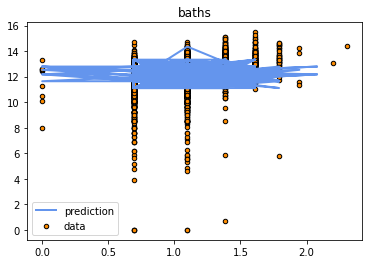

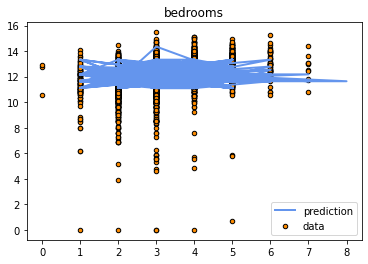

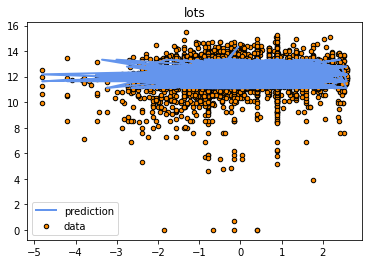

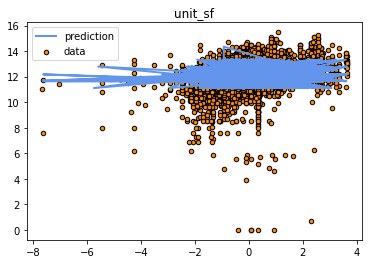

In [15]:
#visualize the tree: 

def tree_prediction_visual(x,y,test,prediction,name):
    plt.figure()
    plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(test, prediction, color="cornflowerblue", label="prediction", linewidth=2)
    plt.title(name)
    plt.legend()

    
for i in range(4):
    xCols = x_values.iloc[:, i]
    xCols = np.array(xCols)
    xCt, xCte, yCt, yCte = train_test_split(xCols.reshape(-1,1), y_value, test_size = 0.3, random_state = 0)
    colNs = ['baths','bedrooms','lots', 'unit_sf']
    tree_prediction_visual(xCt, yCt, xCte, myRTpredcs, colNs[i])

plt.show()

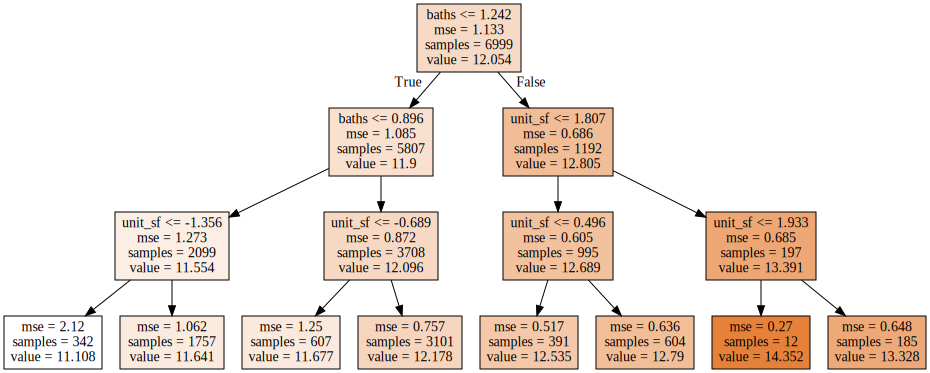

In [16]:
import graphviz
from sklearn import tree

dotdMyTree = tree.export_graphviz(myRegTree, out_file=None, feature_names= x_values.columns, filled = True)
myTreegrph = graphviz.Source(dotdMyTree, format="png") 
myTreegrph

# graph.render("decision_tree_graphivz")



In [18]:
#testing my model on the test dataset 

testSet = pd.read_csv('testset.csv')
testSet.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS
0,11.813030,1,3,1985,2200.0,33000.0,7
1,12.429216,2,3,2001,2500.0,66000.0,7
2,13.171154,2,3,1940,3700.0,11000.0,8
3,10.819778,1,2,1930,700.0,900.0,5
4,13.235692,2,3,2000,1954.0,3000.0,6


In [25]:
#no transforms on this dataset will yield the following results: 

tst_x = testSet[['BATHS','BEDRMS','UNITSF','LOT']]
tst_y = testSet['LOGVALUE']


# predict values for this new dataset with the same tree that was trained on the previous dataset 
myRTpredcststset = myRegTree.predict(tst_x)


mseRTtst = mean_squared_error(tst_y, myRTpredcststset)
# mse_trRT = mean_squared_error(ytrainingSet, trainPred)
r2Rttst = r2_score(tst_y, myRTpredcststset)
# rCVrt = r2_score(ytrainingSet, trainPred)

print("MSE for this tree is: ", mseRTtst)
print("R-squared for this tree is: ", r2Rttst)




MSE for this tree is:  1.9325568750961655
R-squared for this tree is:  -0.716848195016631


In [32]:
#transform data as well 

x1 = np.array(ds['BATHS'])
x2 = np.array(ds['BEDRMS'])
x3 = np.array(ds['BUILT'])
x4 = np.array(ds['UNITSF'])
x5 = np.array(ds['LOT'])
x6 = np.array(ds['ROOMS'])

xtest1 = np.array(testSet['BATHS'])
xtest2 = np.array(testSet['BEDRMS'])
xtest3 = np.array(testSet['UNITSF'])
xtest4 = np.array(testSet['LOT'])

xtst1_trans = log_transformer.transform(xtest1)
xtst3_trans = pt.fit(xtest3.reshape(-1,1)).transform(xtest3.reshape(-1,1))
xtst4_trans = pt.fit(xtest4.reshape(-1,1)).transform(xtest4.reshape(-1,1))

#add these to testdataset 
test_x_ = np.concatenate((xtst1_trans.reshape(-1,1), xtest2.reshape(-1,1), xtst3_trans.reshape(-1,1), xtst4_trans.reshape(-1,1)), axis=1)
test_x_df = pd.DataFrame(test_x_, columns = ['BATHS', 'BEDRMS', 'UNITSF', 'LOT'])
test_x_np = np.array(test_x_df)

#now run the tree predictions on this normalized dataset 
myRTpredcststset_nr = myRegTree.predict(test_x_)


mseRTtst_nr = mean_squared_error(tst_y, myRTpredcststset_nr)
r2Rttst_nr = r2_score(tst_y, myRTpredcststset_nr)

print("MSE for normalized test tree is: ", mseRTtst_nr)
print("R-squared for normalized test tree is: ", r2Rttst_nr)

MSE for normalized test tree is:  1.0019295598074234
R-squared for normalized test tree is:  0.10990409728376771


This is the final result with Test set. 

**MSE**: 1.002

**R^2**: 11% 
